In [1]:
#Importing the necessary libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
Netflix = pd.read_csv('netflix_data.csv')

In [3]:
#Loading the first few rows of the dataset
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
#For more information about the dataset
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [5]:
#Check for missing values
Netflix.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [ ]:
#Filling and dropping the missing values
Netflix['director'].fillna('unknown', inplace=True)
Netflix['cast'].fillna('unknown', inplace=True)
Netflix['country'].fillna('unknown', inplace=True)
Netflix.dropna(subset = 'date_added', inplace=True)

In [7]:
#Checking again for missing values
Netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [8]:
#Coverting the 'date_added' column to a datetime format
Netflix['date_added'] = pd.to_datetime(Netflix['date_added'], format = '%B %d, %Y', errors = 'coerce')

In [9]:
#Check for duplicates
Netflix.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7777, dtype: bool

In [10]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   duration      7777 non-null   int64         
 9   description   7777 non-null   object        
 10  genre         7777 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 729.1+ KB


In [11]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


# ASK
## DEFINE THE PROBLEM
* WHAT TYPE OF CONTENT DOES NETFLIX PRODUCE MORE?
* WHICH GENRE ARE THE MOST COMMON?
* WHAT ARE THE TOP COUNTRIES CONTRIBUTING TO NETFLIX LIBRARY?
* HOW HAS NETFLIX CONTENT CHANGED OVER TIME?
* WHAT ARE THE TOP LONGEST DURATION MOVIES ON NETFLIX?
* WHAT ARE THE TOP LONGEST DURATION TV SHOWS ON NETFLIX?

# PREPARE
## GATHER AND UNDERSTAND THE DATA
* DATASET USED: netflix_data.csv
* SOURCE: UPLOADED FROM DATACAMP
* TOOLS USED: PYTHON

# PROCESS
### INITIAL OBSERVATIONS:
* THERE ARE 7,787 ENTRIES GIVEN FROM THE DATASET. 
* THERE WERE MISSING VALUES IN THE COLUMN; DIRECTOR, CAST, COUNTRY AND DATE_ADDED.
* FOR THE MISSING VALUES IN THE COLUMN; DIRECTOR, CAST AND COUNTRY, I FILLED THEM UP WITH THE WORD 'UNKNOWN' AND ALSO FOR THE MISSING VALUES IN DATE_ADDED, I DROPPED THEM.
* AFTER FILLING AND DROPPING THE MISSING VALUES, WE NOW HAVE 7,777 ENTRIES IN THE NETFLIX DATASET.
* I NOTICED THAT THE DATES IN THE COLUMN 'DATE_ADDED' IS GIVEN AS AN OBJECT AS THE DATATYPE WHICH IS WRONG, SO I CHANGED IT TO A DATETIME FORMAT.


# ANALYZE AND SHARE
### ANSWERING THE FOUR QUESTIONS IN THE ASK SEGMENT

### 1. WHAT TYPE OF CONTENT DOES NETFLIX PRODUCE MORE?
* BASED ON THE BAR CHART BELOW, MOVIE IS THE MOST CONTENT BEING PRODUCED BY NETFLIX WHILE TV SHOWS ARE FEWER.

type
Movie      5377
TV Show    2400
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_4268\30736663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type', data = Netflix, palette = 'coolwarm')


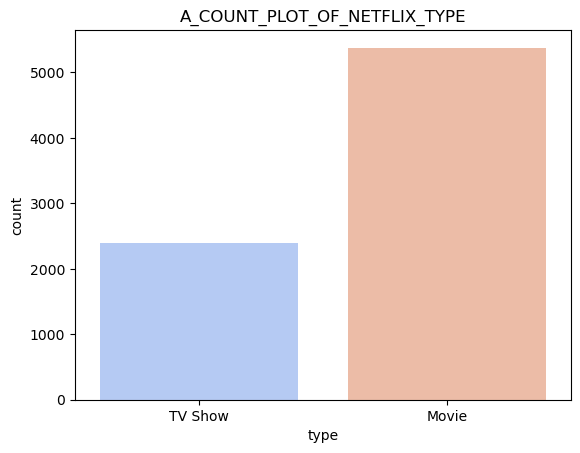

In [12]:
# Check for content Netflix produce more
Netflix_type = Netflix['type'].value_counts()
print(Netflix_type)

# Plotting a bar chart
sns.countplot(x = 'type', data = Netflix, palette = 'coolwarm')
plt.title('A_COUNT_PLOT_OF_NETFLIX_TYPE')
plt.show()

### 2.WHICH GENRE ARE THE MOST COMMON?
* BASED ON THE BAR CHART BELOW; DRAMAS, COMEDIES AND DOCUMENTARIES ARE THE MOST DOMINANT GENRE THAN THE OTHERS.

genre
Dramas              1384
Comedies            1074
Documentaries        751
Action               721
International TV     689
Children             502
Crime TV             369
Kids                 357
Stand-Up             354
Horror Movies        244
Name: count, dtype: int64


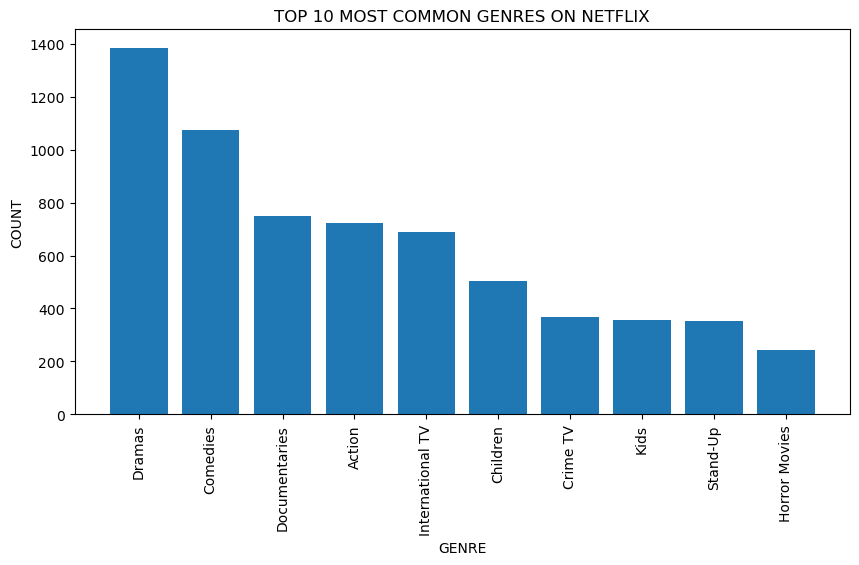

In [13]:
# Check for most common genre
Netflix_gen = Netflix['genre'].value_counts().head(10)
print(Netflix_gen)

# Plotting a bar chart
plt.figure(figsize = (10,5))
plt.bar(Netflix_gen.index,Netflix_gen.values)
plt.title('TOP 10 MOST COMMON GENRES ON NETFLIX')
plt.xlabel('GENRE')
plt.ylabel('COUNT')
plt.xticks(rotation = 90)
plt.show()

### 3.WHAT ARE THE TOP COUNTRIES CONTRIBUTING TO NETFLIX LIBRARY
* BASED ON THE BAR CHART BELOW, UNITED STATES LEADS BY FAR FOLLOWED BY INDIA, THE UNITED KINGDOM AND OTHER COUNTRIES.

country
United States     2877
India              956
United Kingdom     576
unknown            506
Canada             259
Japan              236
France             196
South Korea        194
Spain              168
Mexico             123
Name: count, dtype: int64


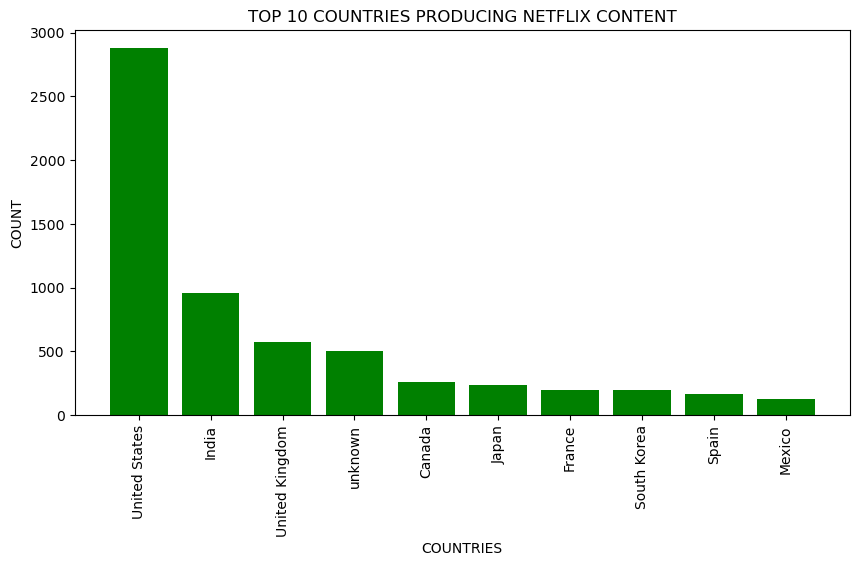

In [14]:
# Check for top countries contributing to Netflix library
Netflix_co = Netflix['country'].value_counts().head(10)
print(Netflix_co)

# Plotting a bar chart
plt.figure(figsize = (10,5))
plt.bar(Netflix_co.index,Netflix_co.values, color = 'green')
plt.title('TOP 10 COUNTRIES PRODUCING NETFLIX CONTENT')
plt.xlabel('COUNTRIES')
plt.ylabel('COUNT')
plt.xticks(rotation = 90)
plt.show()

### 4. HOW HAS THE NUMBER OF NETFLIX RELEASES CHANGED OVER THE YEARS?
* BASED ON THE BAR CHART BELOW, NETFLIX CONTENT HAS GROWN SIGNIFICANTLY OVER THE YEARS WITH A HUGE SPIKE FROM 2015 ONWARD.

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1120
2019     996
2020     868
2021      31
Name: count, Length: 73, dtype: int64


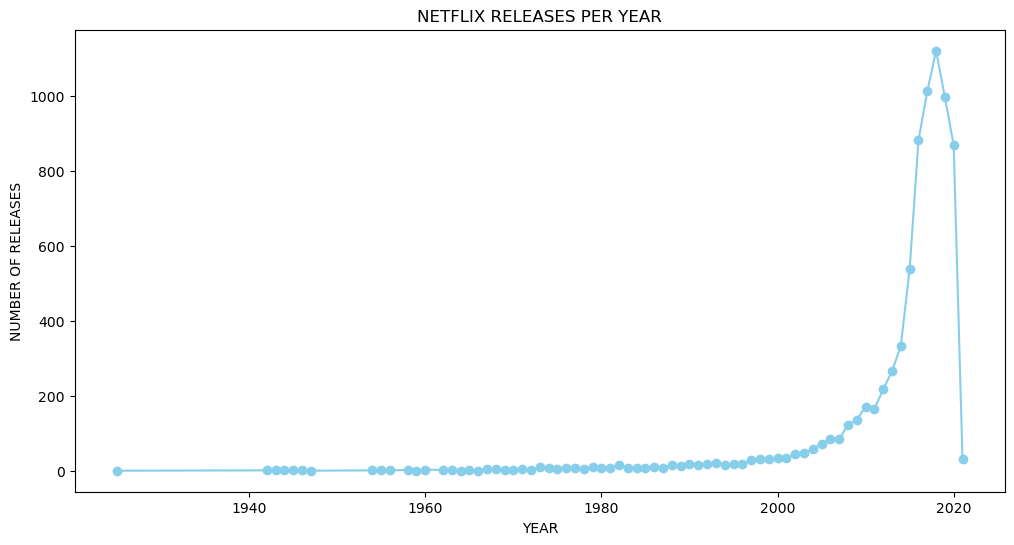

In [20]:
# Number of Netflix releases changed over the years 
Netflix_release = Netflix['release_year'].value_counts().sort_index()
print(Netflix_release)

# Plotting a line chart
plt.figure(figsize = (12,6))
Netflix_release.plot(kind='line', marker='o', color="skyblue")
plt.title("NETFLIX RELEASES PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF RELEASES")
plt.show()

### 5. WHAT ARE THE TOP LONGEST DURATION MOVIES ON NETFLIX?
* BASED ON THE BAR CHART BELOW, THE MOVIES - BLACK MIRROR: BANDERSNATCH, THE SCHOOL OF MISCHIEF AND NO LONGER KIDS ARE THE TOP LONGEST MOVIES ON NETFLIX WITH A DURATION OF 312, 253 AND 237 MINUTES RESPECTIVELY.

                           title  duration  release_year
957   Black Mirror: Bandersnatch       312          2018
6850      The School of Mischief       253          1973
4490              No Longer kids       237          1979
3694          Lock Your Girls In       233          1982
5108             Raya and Sakina       230          1984
5376                      Sangam       228          1964
3521                      Lagaan       224          2001
3195                Jodhaa Akbar       214          2008
6507                The Irishman       209          2019
3282    Kabhi Khushi Kabhie Gham       209          2001


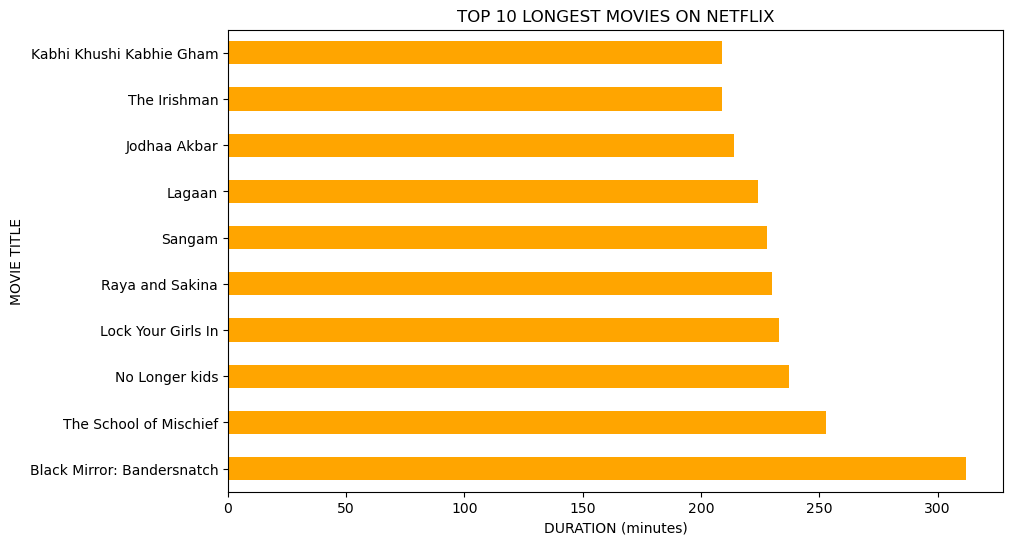

In [16]:
# Top longest duration movies on Netflix
Movies = Netflix[Netflix['type'] == 'Movie']
Longest_movies = Movies.sort_values(by='duration', ascending=False).head(10)[['title', 'duration', 'release_year']]
print(Longest_movies)

# Plotting a bar chart
plt.figure(figsize=(10,6))
Longest_movies.set_index('title')['duration'].plot(kind='barh',color='orange')
plt.title('TOP 10 LONGEST MOVIES ON NETFLIX')
plt.xlabel('DURATION (minutes)')
plt.ylabel('MOVIE TITLE')
plt.show()

### 6. WHAT ARE THE TOP LONGEST DURATION TV SHOWS ON NETFLIX?
* BASED ON THE BAR CHART BELOW, THE TV SHOWS - GREY'S ANATOMY, SUPERNATURAL AND NCIS ARE THE TOP LONGEST TV SHOWS ON NETFLIX WITH A DURATION OF 16, 15 AND 15 MINUTES RESPECTIVELY.

                                 title  duration  release_year
2538                    Grey's Anatomy        16          2019
5912                      Supernatural        15          2019
4438                              NCIS        15          2017
1471            COMEDIANS of the world        13          2019
1537                    Criminal Minds        12          2017
7169                 Trailer Park Boys        12          2018
2678                         Heartland        11          2017
1300                            Cheers        11          1992
1597  Danger Mouse: Classic Collection        10          1992
5538                  Shameless (U.S.)        10          2019


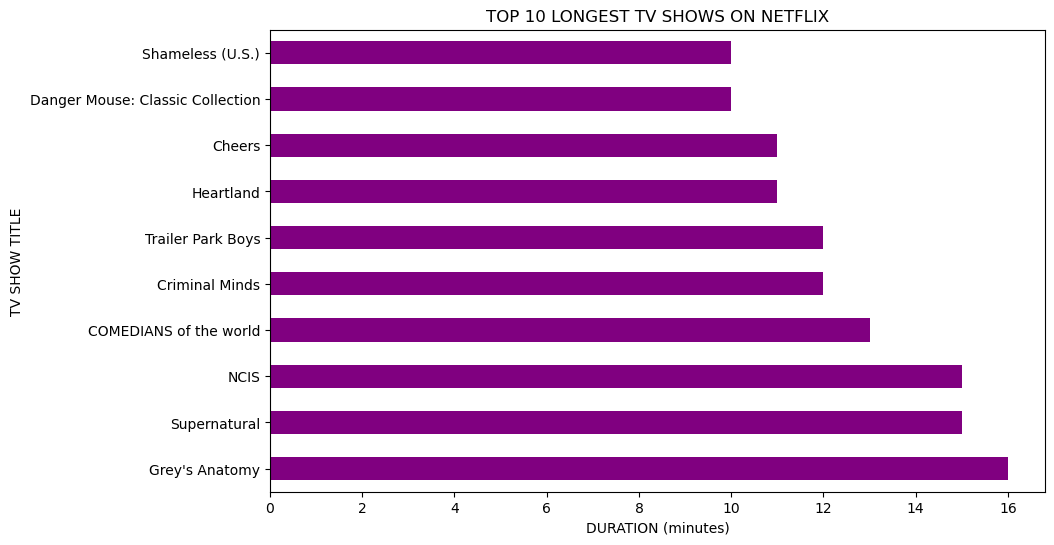

In [17]:
# Top longest duration TV Show on Netflix
TV_Show = Netflix[Netflix['type'] == 'TV Show']
Longest_show = TV_Show.sort_values(by='duration', ascending=False).head(10)[['title', 'duration', 'release_year']]
print(Longest_show)

# Plotting a bar chart
plt.figure(figsize=(10,6))
Longest_show.set_index('title')['duration'].plot(kind='barh',color='purple')
plt.title('TOP 10 LONGEST TV SHOWS ON NETFLIX')
plt.xlabel('DURATION (minutes)')
plt.ylabel('TV SHOW TITLE')
plt.show()

# ACT
## INSIGHTS

1. Netflix has more Movies than TV Shows.
2. The United States produces the highest number of titles, followed by India and the United Kingdom.
3. Netflix’s content library grew rapidly after 2015, peaking around 2018 with the highest releases.
4. Dramas, Comedies, and International TV shows are the most frequent genres.
5. 2018 saw the largest number of Netflix additions (over 1,100 titles).

## RECOMMENDATIONS
### SUGGESTIONS TO MAKE NETFLIX IMPROVE MORE

1. Since Movies dominate the catalog, Netflix can add more TV Shows to keep long-term engagement. 
2. The United States, India, and the United Kingdom dominate production, but other regions (Africa, Southeast Asia, South America) present unexplored opportunities for Netflix to expand.
3. Dramas, Comedies, and International TV are most popular. Netflix should produce more of these genres. At the same time, Netflix should expand lesser-known genres like Sci-Fi, Horror, and Documentaries to attract wider audiences.
4. With thousands of titles, users may struggle to find content. Netflix can enhance recommendation systems by emphasizing trending genres by country.
5. Partnering with regional studios (like Bollywood, Nollywood, Korean studios) would allow Netflix to produce authentic local stories while expanding its global subscriber base.

## CONCLUSION

This research shows Netflix has more movies than TV shows, with the United States, India, and the United Kingdom producing most titles. Popular genres are dramas, comedies, and international shows, and Netflix’s biggest growth came after 2015. Overall, Netflix is global but still has room to expand into new regions and genres.